In [2]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


In [3]:
# Download IMDB dataset
NUM_WORDS = 10000
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0 # distrubute multi-hot encoding
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

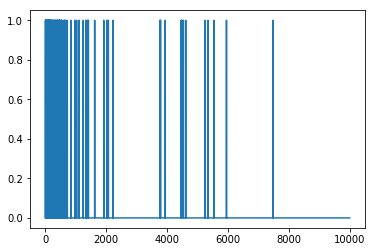

In [4]:
plt.plot(train_data[0])

In [5]:
# Create baseline model
baseline_model = keras.Sequential([
    # 'input shape' is only required here so that '.summary' works.
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy','binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [6]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.4793 - acc: 0.8161 - binary_crossentropy: 0.4793 - val_loss: 0.3404 - val_acc: 0.8730 - val_binary_crossentropy: 0.3404
Epoch 2/20
 - 3s - loss: 0.2516 - acc: 0.9099 - binary_crossentropy: 0.2516 - val_loss: 0.2845 - val_acc: 0.8882 - val_binary_crossentropy: 0.2845
Epoch 3/20
 - 3s - loss: 0.1848 - acc: 0.9347 - binary_crossentropy: 0.1848 - val_loss: 0.2879 - val_acc: 0.8863 - val_binary_crossentropy: 0.2879
Epoch 4/20
 - 3s - loss: 0.1475 - acc: 0.9491 - binary_crossentropy: 0.1475 - val_loss: 0.3125 - val_acc: 0.8800 - val_binary_crossentropy: 0.3125
Epoch 5/20
 - 3s - loss: 0.1219 - acc: 0.9590 - binary_crossentropy: 0.1219 - val_loss: 0.3408 - val_acc: 0.8747 - val_binary_crossentropy: 0.3408
Epoch 6/20
 - 3s - loss: 0.1010 - acc: 0.9682 - binary_crossentropy: 0.1010 - val_loss: 0.3720 - val_acc: 0.8698 - val_binary_crossentropy: 0.3720
Epoch 7/20
 - 3s - loss: 0.0841 - acc: 0.9751 - binary_crossentropy:

In [7]:
# Create a smaller model
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [8]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.6114 - acc: 0.7626 - binary_crossentropy: 0.6114 - val_loss: 0.5056 - val_acc: 0.8482 - val_binary_crossentropy: 0.5056
Epoch 2/20
 - 3s - loss: 0.4082 - acc: 0.8774 - binary_crossentropy: 0.4082 - val_loss: 0.3784 - val_acc: 0.8701 - val_binary_crossentropy: 0.3784
Epoch 3/20
 - 3s - loss: 0.3051 - acc: 0.9018 - binary_crossentropy: 0.3051 - val_loss: 0.3231 - val_acc: 0.8822 - val_binary_crossentropy: 0.3231
Epoch 4/20
 - 3s - loss: 0.2497 - acc: 0.9182 - binary_crossentropy: 0.2497 - val_loss: 0.2988 - val_acc: 0.8852 - val_binary_crossentropy: 0.2988
Epoch 5/20
 - 3s - loss: 0.2149 - acc: 0.9281 - binary_crossentropy: 0.2149 - val_loss: 0.2889 - val_acc: 0.8866 - val_binary_crossentropy: 0.2889
Epoch 6/20
 - 3s - loss: 0.1896 - acc: 0.9362 - binary_crossentropy: 0.1896 - val_loss: 0.2841 - val_acc: 0.8878 - val_binary_crossentropy: 0.2841
Epoch 7/20
 - 3s - loss: 0.1699 - acc: 0.9437 - binary_crossentropy:

In [9]:
# Create bigger model
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [10]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 9s - loss: 0.3464 - acc: 0.8524 - binary_crossentropy: 0.3464 - val_loss: 0.2940 - val_acc: 0.8805 - val_binary_crossentropy: 0.2940
Epoch 2/20
 - 8s - loss: 0.1347 - acc: 0.9510 - binary_crossentropy: 0.1347 - val_loss: 0.3602 - val_acc: 0.8635 - val_binary_crossentropy: 0.3602
Epoch 3/20
 - 8s - loss: 0.0417 - acc: 0.9884 - binary_crossentropy: 0.0417 - val_loss: 0.4360 - val_acc: 0.8695 - val_binary_crossentropy: 0.4360
Epoch 4/20
 - 10s - loss: 0.0063 - acc: 0.9991 - binary_crossentropy: 0.0063 - val_loss: 0.5930 - val_acc: 0.8696 - val_binary_crossentropy: 0.5930
Epoch 5/20
 - 9s - loss: 7.3049e-04 - acc: 1.0000 - binary_crossentropy: 7.3049e-04 - val_loss: 0.6800 - val_acc: 0.8713 - val_binary_crossentropy: 0.6800
Epoch 6/20
 - 8s - loss: 2.0133e-04 - acc: 1.0000 - binary_crossentropy: 2.0133e-04 - val_loss: 0.7236 - val_acc: 0.8712 - val_binary_crossentropy: 0.7236
Epoch 7/20
 - 8s - loss: 1.2089e-04 - acc: 1.0000 -

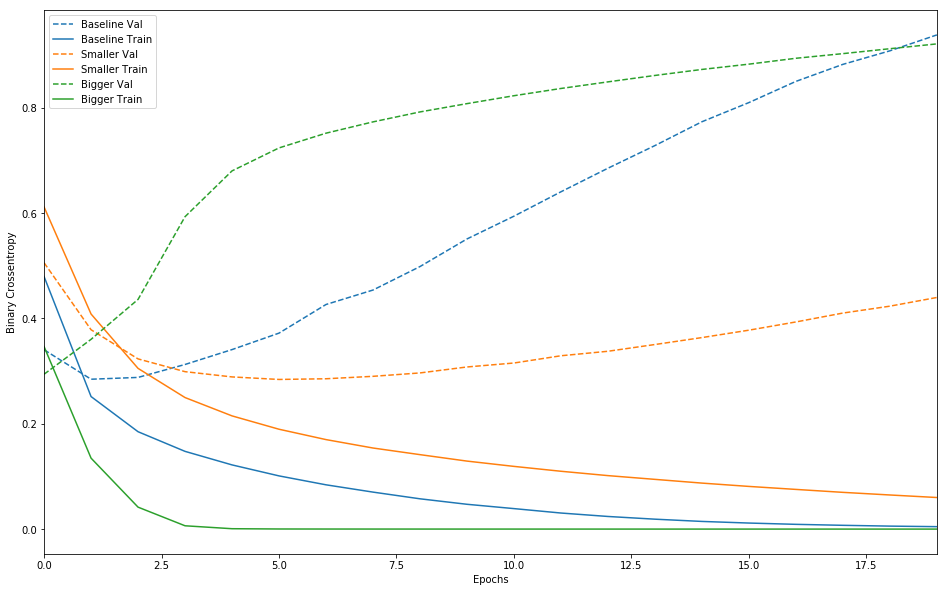

In [11]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                      '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')
        
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()
    
    plt.xlim([0,max(history.epoch)])
    
plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [17]:
# Using weight regularization
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy','binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.5311 - acc: 0.8055 - binary_crossentropy: 0.4898 - val_loss: 0.3840 - val_acc: 0.8778 - val_binary_crossentropy: 0.3403
Epoch 2/20
 - 3s - loss: 0.3079 - acc: 0.9078 - binary_crossentropy: 0.2597 - val_loss: 0.3365 - val_acc: 0.8886 - val_binary_crossentropy: 0.2850
Epoch 3/20
 - 4s - loss: 0.2564 - acc: 0.9292 - binary_crossentropy: 0.2022 - val_loss: 0.3397 - val_acc: 0.8875 - val_binary_crossentropy: 0.2839
Epoch 4/20
 - 3s - loss: 0.2330 - acc: 0.9393 - binary_crossentropy: 0.1755 - val_loss: 0.3541 - val_acc: 0.8820 - val_binary_crossentropy: 0.2955
Epoch 5/20
 - 3s - loss: 0.2184 - acc: 0.9457 - binary_crossentropy: 0.1584 - val_loss: 0.3664 - val_acc: 0.8790 - val_binary_crossentropy: 0.3055
Epoch 6/20
 - 4s - loss: 0.2079 - acc: 0.9495 - binary_crossentropy: 0.1462 - val_loss: 0.3811 - val_acc: 0.8752 - val_binary_crossentropy: 0.3188
Epoch 7/20
 - 3s - loss: 0.1995 - acc: 0.9529 - binary_crossentropy:

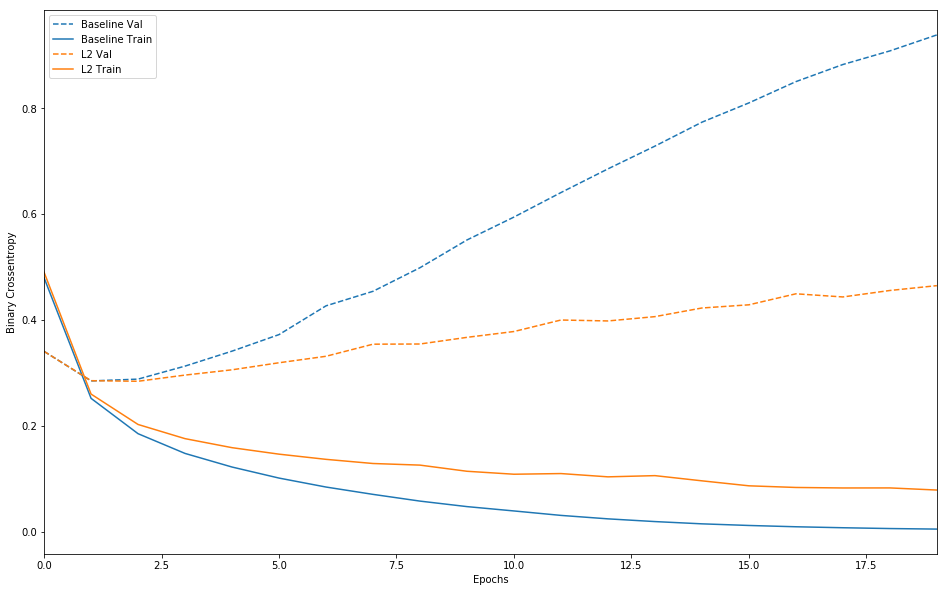

In [18]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [21]:
# Add dropout
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 7s - loss: 0.6311 - acc: 0.6339 - binary_crossentropy: 0.6311 - val_loss: 0.5136 - val_acc: 0.8545 - val_binary_crossentropy: 0.5136
Epoch 2/20
 - 3s - loss: 0.4721 - acc: 0.7956 - binary_crossentropy: 0.4721 - val_loss: 0.3549 - val_acc: 0.8815 - val_binary_crossentropy: 0.3549
Epoch 3/20
 - 3s - loss: 0.3701 - acc: 0.8558 - binary_crossentropy: 0.3701 - val_loss: 0.2939 - val_acc: 0.8888 - val_binary_crossentropy: 0.2939
Epoch 4/20
 - 3s - loss: 0.3026 - acc: 0.8903 - binary_crossentropy: 0.3026 - val_loss: 0.2747 - val_acc: 0.8898 - val_binary_crossentropy: 0.2747
Epoch 5/20
 - 3s - loss: 0.2581 - acc: 0.9096 - binary_crossentropy: 0.2581 - val_loss: 0.2796 - val_acc: 0.8868 - val_binary_crossentropy: 0.2796
Epoch 6/20
 - 3s - loss: 0.2204 - acc: 0.9252 - binary_crossentropy: 0.2204 - val_loss: 0.2909 - val_acc: 0.8878 - val_binary_crossentropy: 0.2909
Epoch 7/20
 - 3s - loss: 0.1942 - acc: 0.9338 - binary_crossentropy:

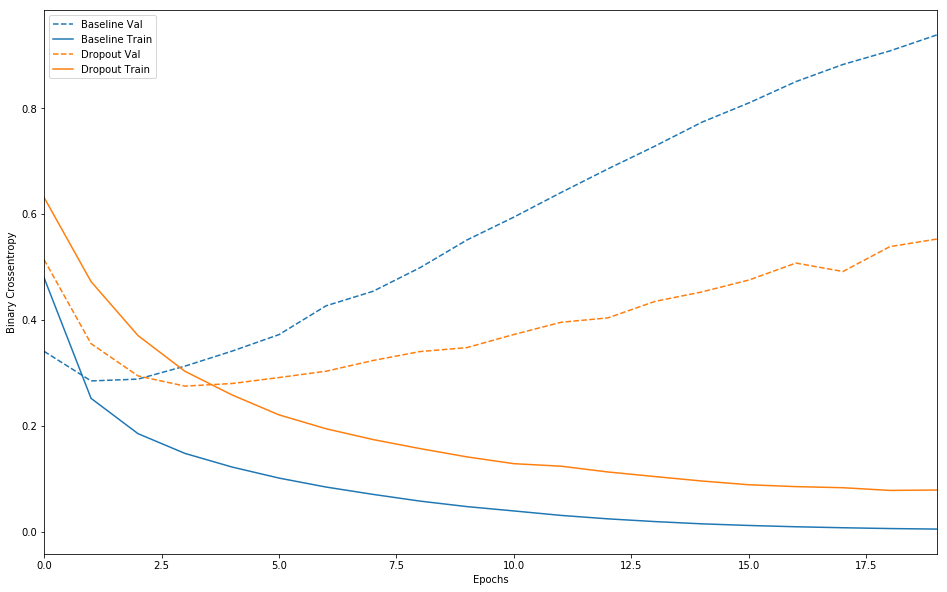

In [22]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])